In [2]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z 
        
    def multiply(self, multiplier):
        return Point(self.x * multiplier, self.y * multiplier, self.z * multiplier)
    
    def divide(self, divider):
        return Point(self.x / divider, self.y / divider, self.z / divider)
    
    def __add__(self, otherPoint):
        return Point(self.x + otherPoint.x, self.y + otherPoint.y, self.z + otherPoint.z)
    
    def __sub__(self, otherPoint):
        return Point(self.x - otherPoint.x, self.y - otherPoint.y, self.z - otherPoint.z)
        
        
class deCasteljau:
    def __init__(self, points):
        self.points = points
    
    def b(self,r,i,t):
        
        #print("r: ", r)
        #print("i: ", i)
        
        if r == 0:
            return self.points[i];
        
        return  self.b(r - 1, i, t).multiply(1 - t) +  self.b(r - 1, i + 1, t).multiply(t)
    
def factorial(n):
    fact = 1
    for i in range(1,n+1): 
        fact = fact * i 
    return fact

def binomial(n, i):
    if (i >= 0 and i <= n):
        return factorial(n)/(factorial(i) * factorial(n - i))
    else:
        return 0
    
class Berstein:

    def B(self, n, i, t):
        
        if (n == 0 and i == 0):
            return 1
        elif (i > n or i < 0):
            return 0
        
        return (1 - t) * self.B(n - 1, i, t) + t * self.B(n - 1, i - 1, t)
        

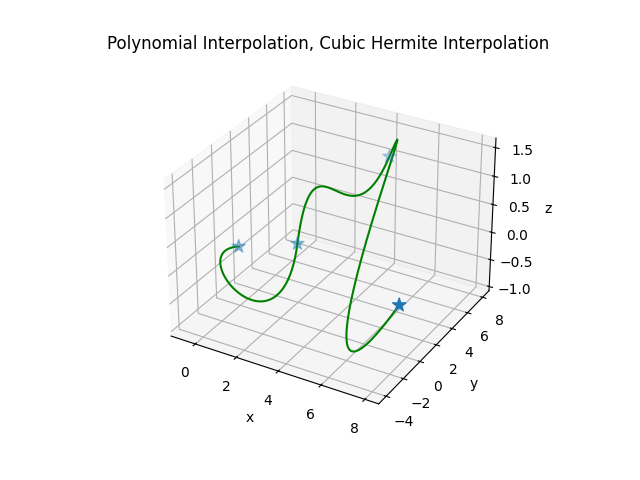

In [3]:
#6.5 p. 90
#Cubic Hermite Interpolation (affine) (testing array generated in c++)

import copy

from mpl_toolkits import mplot3d

%matplotlib ipympl
import numpy as np 
import matplotlib.pyplot as plt

piecelines = [[0,0,0],
            [-0.0591901,-0.059794,-0.0006039],
            [-0.114801,-0.117192,-0.0023912],
            [-0.166893,-0.172218,-0.0053253],
            [-0.215526,-0.224896,-0.0093696],
            [-0.260762,-0.27525,-0.0144875],
            [-0.302662,-0.323304,-0.0206424],
            [-0.341284,-0.369082,-0.0277977],
            [-0.376691,-0.412608,-0.0359168],
            [-0.408943,-0.453906,-0.0449631],
            [-0.4381,-0.493,-0.0549],
            [-0.464223,-0.529914,-0.0656909],
            [-0.487373,-0.564672,-0.0772992],
            [-0.50761,-0.597298,-0.0896883],
            [-0.524994,-0.627816,-0.102822],
            [-0.539587,-0.65625,-0.116662],
            [-0.55145,-0.682624,-0.131174],
            [-0.560641,-0.706962,-0.146321],
            [-0.567223,-0.729288,-0.162065],
            [-0.571256,-0.749626,-0.17837],
            [-0.5728,-0.768,-0.1952],
            [-0.571916,-0.784434,-0.212518],
            [-0.568665,-0.798952,-0.230287],
            [-0.563107,-0.811578,-0.248471],
            [-0.555302,-0.822336,-0.267034],
            [-0.545312,-0.83125,-0.285938],
            [-0.533198,-0.838344,-0.305146],
            [-0.519018,-0.843642,-0.324624],
            [-0.502835,-0.847168,-0.344333],
            [-0.484709,-0.848946,-0.364237],
            [-0.4647,-0.849,-0.3843],
            [-0.442869,-0.847354,-0.404485],
            [-0.419277,-0.844032,-0.424755],
            [-0.393984,-0.839058,-0.445074],
            [-0.36705,-0.832456,-0.465406],
            [-0.338537,-0.82425,-0.485713],
            [-0.308506,-0.814464,-0.505958],
            [-0.277015,-0.803122,-0.526107],
            [-0.244127,-0.790248,-0.546121],
            [-0.209902,-0.775866,-0.565964],
            [-0.1744,-0.76,-0.5856],
            [-0.137682,-0.742674,-0.604992],
            [-0.0998088,-0.723912,-0.624103],
            [-0.0608407,-0.703738,-0.642897],
            [-0.0208384,-0.682176,-0.661338],
            [0.0201375,-0.65925,-0.679388],
            [0.0620264,-0.634984,-0.69701],
            [0.104768,-0.609402,-0.71417],
            [0.148301,-0.582528,-0.730829],
            [0.192565,-0.554386,-0.746951],
            [0.2375,-0.525,-0.7625],
            [0.283045,-0.494394,-0.777439],
            [0.329139,-0.462592,-0.791731],
            [0.375722,-0.429618,-0.80534],
            [0.422734,-0.395496,-0.81823],
            [0.470113,-0.36025,-0.830363],
            [0.517798,-0.323904,-0.841702],
            [0.565731,-0.286482,-0.852213],
            [0.613849,-0.248008,-0.861857],
            [0.662092,-0.208506,-0.870598],
            [0.7104,-0.168,-0.8784],
            [0.758712,-0.126514,-0.885226],
            [0.806967,-0.084072,-0.891039],
            [0.855105,-0.040698,-0.895803],
            [0.903066,0.003584,-0.899482],
            [0.950788,0.04875,-0.902037],
            [0.99821,0.094776,-0.903434],
            [1.04527,0.141638,-0.903636],
            [1.09192,0.189312,-0.902605],
            [1.13808,0.237774,-0.900305],
            [1.1837,0.287,-0.8967],
            [1.22872,0.336966,-0.891753],
            [1.27308,0.387648,-0.885427],
            [1.31671,0.439022,-0.877686],
            [1.35956,0.491064,-0.868494],
            [1.40156,0.54375,-0.857812],
            [1.44266,0.597056,-0.845606],
            [1.4828,0.650958,-0.831839],
            [1.5219,0.705432,-0.816473],
            [1.55993,0.760454,-0.799472],
            [1.5968,0.816,-0.7808],
            [1.63247,0.872046,-0.76042],
            [1.66686,0.928568,-0.738295],
            [1.69993,0.985542,-0.714389],
            [1.73161,1.04294,-0.688666],
            [1.76184,1.10075,-0.661087],
            [1.79055,1.15894,-0.631618],
            [1.8177,1.21748,-0.600222],
            [1.84321,1.27635,-0.566861],
            [1.86703,1.33553,-0.531499],
            [1.8891,1.395,-0.4941],
            [1.90935,1.45473,-0.454627],
            [1.92773,1.51469,-0.413043],
            [1.94417,1.57486,-0.369312],
            [1.95862,1.63522,-0.323398],
            [1.97101,1.69575,-0.275262],
            [1.98129,1.75642,-0.22487],
            [1.98938,1.8172,-0.172185],
            [1.99524,1.87807,-0.117169],
            [1.9988,1.93901,-0.0597861],
            [2,2,4.06342e-15],
            [2,2,0],
            [1.99999,2.06157,0.0594802],
            [1.99998,2.12427,0.115962],
            [1.99997,2.18806,0.169505],
            [1.99997,2.2529,0.220173],
            [2.00001,2.31876,0.268025],
            [2.00009,2.38561,0.313123],
            [2.00023,2.4534,0.355529],
            [2.00044,2.5221,0.395302],
            [2.00072,2.59168,0.432506],
            [2.0011,2.6621,0.4672],
            [2.00159,2.73333,0.499446],
            [2.00219,2.80532,0.529306],
            [2.00292,2.87806,0.556839],
            [2.0038,2.95149,0.582109],
            [2.00484,3.02559,0.605175],
            [2.00604,3.10031,0.626099],
            [2.00743,3.17563,0.644943],
            [2.00901,3.25151,0.661766],
            [2.01079,3.32791,0.676632],
            [2.0128,3.4048,0.6896],
            [2.01504,3.48214,0.700732],
            [2.01752,3.5599,0.71009],
            [2.02026,3.63803,0.717733],
            [2.02327,3.71652,0.723725],
            [2.02656,3.79531,0.728125],
            [2.03015,3.87438,0.730995],
            [2.03404,3.95369,0.732397],
            [2.03826,4.0332,0.73239],
            [2.04281,4.11288,0.731038],
            [2.0477,4.1927,0.7284],
            [2.05295,4.27261,0.724538],
            [2.05857,4.35259,0.719514],
            [2.06458,4.43259,0.713387],
            [2.07098,4.51259,0.706221],
            [2.07779,4.59254,0.698075],
            [2.08502,4.67241,0.689011],
            [2.09268,4.75217,0.679091],
            [2.10079,4.83178,0.668374],
            [2.10936,4.9112,0.656924],
            [2.1184,4.9904,0.6448],
            [2.12792,5.06935,0.632064],
            [2.13794,5.148,0.618778],
            [2.14847,5.22633,0.605001],
            [2.15953,5.30429,0.590797],
            [2.17111,5.38186,0.576225],
            [2.18325,5.459,0.561347],
            [2.19594,5.53566,0.546225],
            [2.2092,5.61183,0.530918],
            [2.22305,5.68745,0.51549],
            [2.2375,5.7625,0.5],
            [2.25256,5.83694,0.48451],
            [2.26824,5.91073,0.469082],
            [2.28455,5.98385,0.453775],
            [2.30151,6.05624,0.438653],
            [2.31914,6.12789,0.423775],
            [2.33743,6.19875,0.409203],
            [2.35642,6.26878,0.394999],
            [2.3761,6.33796,0.381222],
            [2.39649,6.40624,0.367936],
            [2.4176,6.4736,0.3552],
            [2.43945,6.53999,0.343076],
            [2.46205,6.60538,0.331626],
            [2.48541,6.66974,0.320909],
            [2.50954,6.73303,0.310989],
            [2.53446,6.79521,0.301925],
            [2.56018,6.85625,0.293779],
            [2.58671,6.91612,0.286613],
            [2.61407,6.97477,0.280486],
            [2.64226,7.03218,0.275462],
            [2.6713,7.0883,0.2716],
            [2.7012,7.14311,0.268962],
            [2.73198,7.19656,0.26761],
            [2.76365,7.24862,0.267603],
            [2.79621,7.29926,0.269005],
            [2.82969,7.34844,0.271875],
            [2.86409,7.39612,0.276275],
            [2.89943,7.44228,0.282267],
            [2.93572,7.48686,0.28991],
            [2.97297,7.52985,0.299268],
            [3.0112,7.5712,0.3104],
            [3.05042,7.61088,0.323368],
            [3.09063,7.64885,0.338234],
            [3.13186,7.68508,0.355057],
            [3.17412,7.71953,0.373901],
            [3.21741,7.75216,0.394825],
            [3.26176,7.78295,0.417891],
            [3.30717,7.81185,0.443161],
            [3.35365,7.83884,0.470694],
            [3.40122,7.86386,0.500554],
            [3.4499,7.8869,0.5328],
            [3.49969,7.90791,0.567494],
            [3.5506,7.92686,0.604698],
            [3.60266,7.94371,0.644471],
            [3.65587,7.95843,0.686877],
            [3.71024,7.97099,0.731975],
            [3.76579,7.98134,0.779827],
            [3.82252,7.98945,0.830495],
            [3.88046,7.99529,0.884038],
            [3.93962,7.99882,0.94052],
            [4,8,1],
            [4,8,1],
            [4.06037,7.9943,1.05888],
            [4.11951,7.97739,1.11359],
            [4.17744,7.94956,1.16421],
            [4.23419,7.9111,1.21083],
            [4.28977,7.86231,1.25352],
            [4.34423,7.80348,1.29239],
            [4.39757,7.73489,1.3275],
            [4.44983,7.65683,1.35895],
            [4.50103,7.56961,1.38682],
            [4.5512,7.4735,1.4112],
            [4.60036,7.3688,1.43217],
            [4.64854,7.25581,1.44982],
            [4.69576,7.1348,1.46423],
            [4.74204,7.00608,1.47548],
            [4.78742,6.86994,1.48367],
            [4.83192,6.72666,1.48888],
            [4.87556,6.57653,1.49119],
            [4.91837,6.41985,1.49069],
            [4.96038,6.25691,1.48747],
            [5.0016,6.088,1.4816],
            [5.04207,5.91341,1.47318],
            [5.0818,5.73343,1.46228],
            [5.12083,5.54835,1.449],
            [5.15918,5.35846,1.43342],
            [5.19688,5.16406,1.41562],
            [5.23394,4.96544,1.3957],
            [5.2704,4.76288,1.37373],
            [5.30628,4.55667,1.3498],
            [5.3416,4.34712,1.32399],
            [5.3764,4.1345,1.2964],
            [5.41069,3.91911,1.2671],
            [5.44451,3.70125,1.23619],
            [5.47787,3.48119,1.20374],
            [5.5108,3.25924,1.16984],
            [5.54333,3.03569,1.13457],
            [5.57548,2.81082,1.09804],
            [5.60727,2.58492,1.0603],
            [5.63874,2.35829,1.02146],
            [5.66991,2.13122,0.9816],
            [5.7008,1.904,0.9408],
            [5.73144,1.67692,0.899148],
            [5.76185,1.45027,0.85673],
            [5.79206,1.22434,0.813629],
            [5.82209,0.999424,0.769933],
            [5.85198,0.775812,0.725725],
            [5.88173,0.553796,0.681091],
            [5.91139,0.333665,0.636117],
            [5.94097,0.115712,0.590886],
            [5.9705,-0.0997735,0.545486],
            [6,-0.3125,0.5],
            [6.0295,-0.522177,0.454514],
            [6.05903,-0.728512,0.409114],
            [6.08861,-0.931216,0.363883],
            [6.11827,-1.13,0.318909],
            [6.14803,-1.32456,0.274275],
            [6.17791,-1.51462,0.230067],
            [6.20794,-1.69989,0.186371],
            [6.23815,-1.88007,0.14327],
            [6.26856,-2.05487,0.100852],
            [6.2992,-2.224,0.0592],
            [6.33009,-2.38717,0.0184002],
            [6.36126,-2.54409,-0.0214624],
            [6.39273,-2.69447,-0.0603026],
            [6.42452,-2.83802,-0.0980352],
            [6.45668,-2.97444,-0.134575],
            [6.4892,-3.10344,-0.169837],
            [6.52213,-3.22474,-0.203735],
            [6.55549,-3.33805,-0.236186],
            [6.58931,-3.44306,-0.267102],
            [6.6236,-3.5395,-0.2964],
            [6.6584,-3.62707,-0.323994],
            [6.69372,-3.70547,-0.349798],
            [6.7296,-3.77443,-0.373729],
            [6.76606,-3.83364,-0.395699],
            [6.80313,-3.88281,-0.415625],
            [6.84082,-3.92166,-0.433421],
            [6.87917,-3.9499,-0.449001],
            [6.9182,-3.96723,-0.462282],
            [6.95793,-3.97336,-0.473176],
            [6.9984,-3.968,-0.4816],
            [7.03962,-3.95086,-0.487468],
            [7.08163,-3.92165,-0.490694],
            [7.12444,-3.88008,-0.491195],
            [7.16808,-3.82586,-0.488883],
            [7.21258,-3.75869,-0.483675],
            [7.25796,-3.67828,-0.475485],
            [7.30424,-3.58435,-0.464227],
            [7.35146,-3.47661,-0.449818],
            [7.39964,-3.35475,-0.43217],
            [7.4488,-3.2185,-0.4112],
            [7.49897,-3.06756,-0.386822],
            [7.55017,-2.90163,-0.35895],
            [7.60243,-2.72044,-0.327501],
            [7.65577,-2.52368,-0.292387],
            [7.71023,-2.31106,-0.253525],
            [7.76581,-2.0823,-0.210829],
            [7.82256,-1.83711,-0.164213],
            [7.88049,-1.57519,-0.113594],
            [7.93963,-1.29625,-0.0588842],
            [8,-1,4.06342e-15]]


points = [Point(0,0,0), Point(2,2,0), Point(4,8,1), Point(8,-1,0)]

xline = list()
yline = list()
zline = list()

for p in piecelines:
    xline.append(p[0])
    yline.append(p[1])
    zline.append(p[2])

xpoints = list()
ypoints = list()
zpoints = list()

for p in points:
    xpoints.append(p.x)
    ypoints.append(p.y)
    zpoints.append(p.z)
    
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Polynomial Interpolation, Cubic Hermite Interpolation')

ax.plot3D(xline, yline, zline, 'green')
ax.scatter(xpoints, ypoints, zpoints, marker='*',s=100)
